# Linear Regression
## Objectives
## 1. Load a Boston Housing dataset
## 2. Implement simple linear regression and multiple linear regression using scikit-learn.
## 3. Evaluate the models using mean squared error and visualize the regression line.

### About dataset
The Boston Housing Dataset is a classic machine learning dataset that was originally part of the UCI Machine Learning Repository. However, due to ethical concerns regarding potential biases in the data, it has been removed from the repository and from the scikit-learn library. So I have taken dataset from kaggle
Key Characteristics:

- Origin: Collected in 1978 and focuses on housing values in suburbs of Boston, Massachusetts.
- Size: Contains 506 samples (data points) and 13 feature variables.
- Objective: The primary goal is to predict the median value of owner-occupied homes in each suburb based on various factors.
    
The description of all the features is given below:

- CRIM: Per capita crime rate by town

- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

- INDUS: Proportion of non-retail business acres per town

- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX: Nitric oxide concentration (parts per 10 million)

- RM: Average number of rooms per dwelling

- AGE: Proportion of owner-occupied units built prior to 1940

- DIS: Weighted distances to five Boston employment centers

- RAD: Index of accessibility to radial highways

- TAX: Full-value property tax rate per $10,000

- B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

- LSTAT: Percentage of lower status of the population

- MEDV: Median value of owner-occupied homes in $1000s

    MEDV is our **Dependent Varaible** while rest are **Independent Variables**

### Importing reqiured library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [26]:
# Load the CSV dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Display the first 5 rows
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
#Dataset Information
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [28]:
#Description of dataset
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Preprocessing the dataset

In [29]:
# Checking for missing values
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Data Visualization for feature selection 

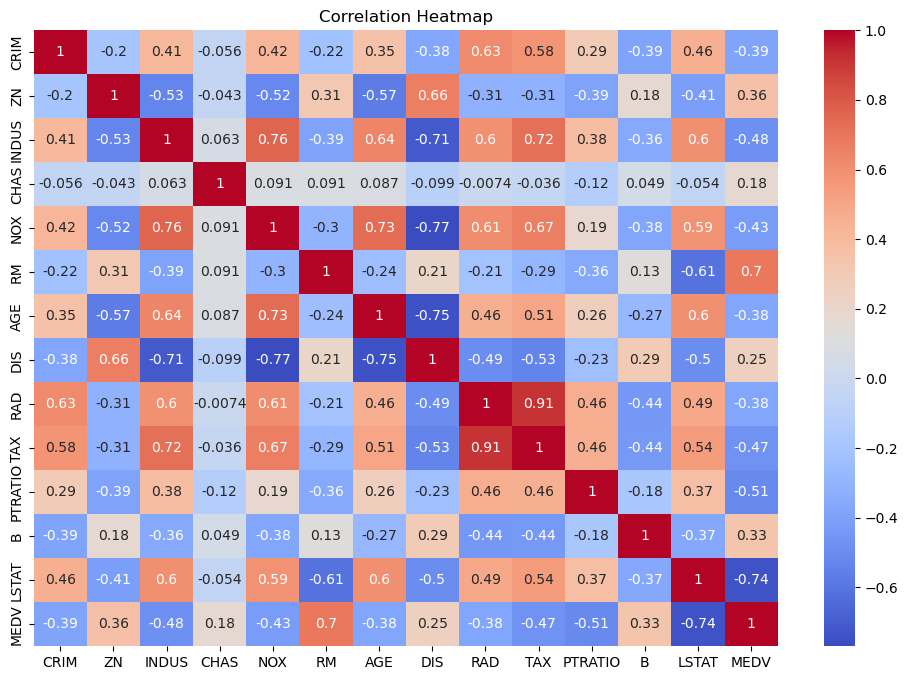

In [30]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Rishi Thakur\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


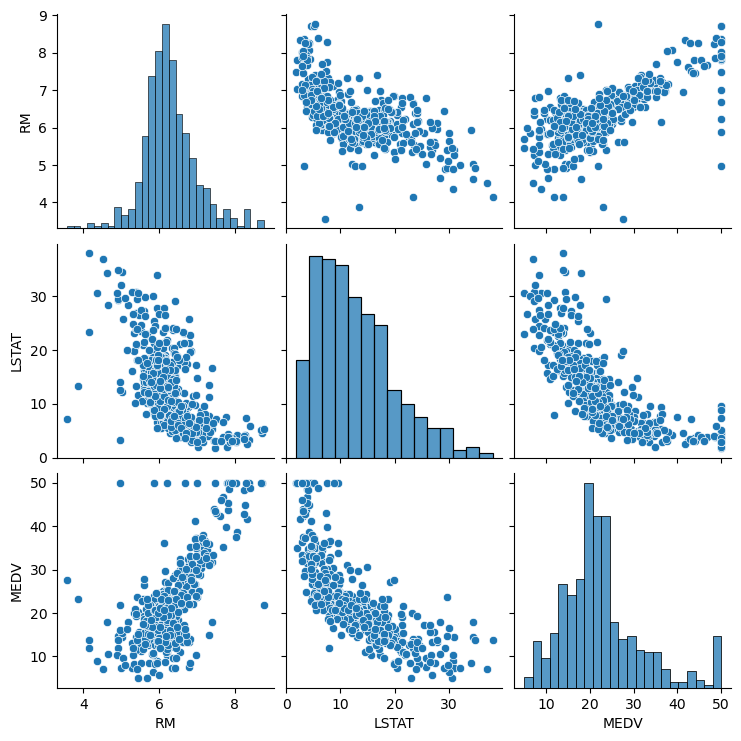

In [31]:
# Pairplot of selected features
sns.pairplot(housing_data[['RM', 'LSTAT', 'MEDV']])
plt.show()

### Extracting features and target

In [32]:
# Define features (X) and target (y)
X = housing_data.drop(columns=['MEDV'])
y = housing_data['MEDV']

### Spliting and scaling of datasets 

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Using one feature for simple linear regression RM' as its correaltion with target is higher
X_simple_train = X_train_scaled[:, X.columns.get_loc('RM')].reshape(-1, 1)
X_simple_test = X_test_scaled[:, X.columns.get_loc('RM')].reshape(-1, 1)

## Simple Regression Model
---
### Model Training and Evaluation

In [35]:
# Model training
simple_lr = LinearRegression()
simple_lr.fit(X_simple_train, y_train)

# Predictions
y_pred_simple = simple_lr.predict(X_simple_test)

In [36]:
# Evaluation
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression -\nMSE: {mse_simple}\nR²: {r2_simple}")

Simple Linear Regression -
MSE: 46.144775347317264
R²: 0.3707569232254778


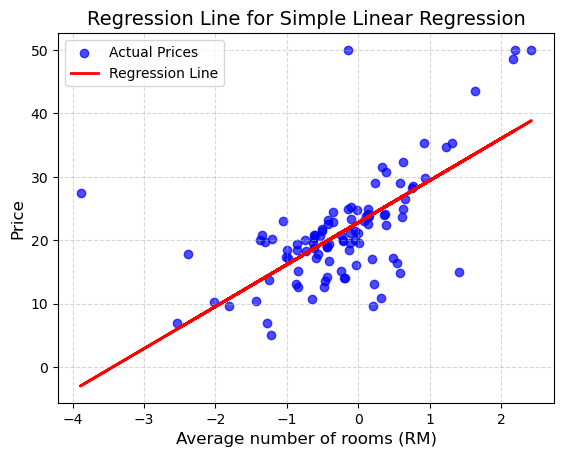

In [37]:
plt.scatter(X_simple_test, y_test, color='blue', label="Actual Prices", alpha=0.7)
plt.plot(X_simple_test, y_pred_simple, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Average number of rooms (RM)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Regression Line for Simple Linear Regression", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Multiple Regression Model
---
### Model Training and Evaluation

In [38]:
# Model training
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_multiple = multiple_lr.predict(X_test_scaled)

# Evaluation
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"Multiple Linear Regression - \nMSE: {mse_multiple}\nR²: {r2_multiple}")


Multiple Linear Regression - 
MSE: 24.291119474973495
R²: 0.6687594935356322


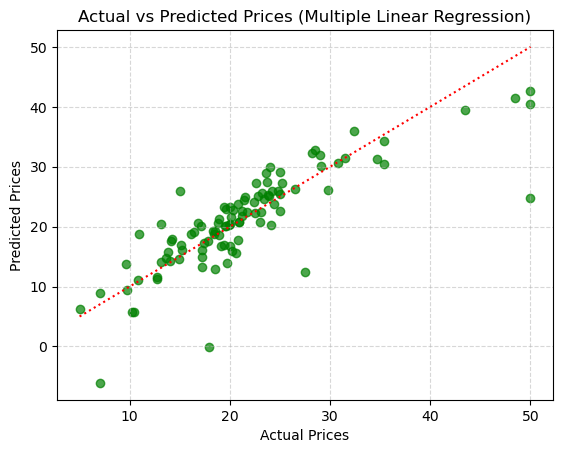

In [39]:
plt.scatter(y_test, y_pred_multiple, color='green',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle=':')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Using diffrent Regression model
Since we can't hypertune above regression models we have use **Lasso**, **Ridge** and **RandomizedSearch by Ridge** where we can regularize them to lower the MSE

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge MSE: {-ridge_grid.best_score_}")


Best Ridge Alpha: 1
Best Ridge MSE: 23.648754583027632


In [41]:
from sklearn.linear_model import Lasso

# Define the model
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso MSE: {-lasso_grid.best_score_}")


Best Lasso Alpha: 0.01
Best Lasso MSE: 23.679272908874086


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter distribution
param_dist = {'alpha': uniform(0.01, 100)}

# Randomized Search for Ridge Regression
ridge_random = RandomizedSearchCV(Ridge(), param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
ridge_random.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best Ridge Alpha (Randomized): {ridge_random.best_params_['alpha']}")
print(f"Best Ridge MSE (Randomized): {-ridge_random.best_score_}")


Best Ridge Alpha (Randomized): 2.0684494295802445
Best Ridge MSE (Randomized): 23.646216972313507


In [43]:
# Ridge evaluation
best_ridge = ridge_grid.best_estimator_
ridge_test_pred = best_ridge.predict(X_test_scaled)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
print(f"Ridge Test MSE: {ridge_test_mse}")

# Lasso evaluation
best_lasso = lasso_grid.best_estimator_
lasso_test_pred = best_lasso.predict(X_test_scaled)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
print(f"Lasso Test MSE: {lasso_test_mse}")


Ridge Test MSE: 24.31290383049162
Lasso Test MSE: 24.333499160616338
